This is a new notebook since the old one is getting super slow.

# 18 April 2017

3:00 pm

Continuing on from yesterday, trying to fix the calculation of ratios for the moon set from April 10.

Ok fixed it. So, if I get the error 'img_metadata referenced before assignment', the likely culprit is that the photometry file is just accidentally empty, so `do_photometry()` just needs to be rerun.

3:30 pm


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from ast import literal_eval
import numpy as np
%matplotlib inline

In [2]:
# Open the dataframe for reading
dffile = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/10April2017_MOON/set1/FR_B-V_82a-11.csv'
B_V_df = pd.read_csv(dffile)

good = B_V_df.loc[B_V_df['B-V'] != -9999]
print(good['B-V'][:10])

print('MAXIMUM B-V VALUE')
print(good.max(numeric_only=True))
print('MINIMUM B-V VALUE')
print(good.min(numeric_only=True))

1     0.167367
2     0.994850
4    -1.505150
6     0.994850
9    -0.272861
11    2.385606
13   -2.500000
15    0.752575
16   -0.000000
19   -1.192803
Name: B-V, dtype: float64
MAXIMUM B-V VALUE
Unnamed: 0    3240.000000
B-V              3.655995
dtype: float64
MINIMUM B-V VALUE
Unnamed: 0    1.0000
B-V          -3.0103
dtype: float64


In [3]:
# Get FITS data and save for using in matplotlib ===========================
default = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera'
dir_extN = '10April2017_MOON/set1/0.7millisec/None'
imgN = '22-33-48-946.FIT'
pathN = '/'.join([default, dir_extN, imgN])
img_fileN = pathN if pathN[-4:] == '.FIT' else pathN + '.FIT'
hdu_list = fits.open(img_fileN)
hdu_list.info()
image_data = hdu_list[0].data
hdu_list.close()

Filename: /home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/10April2017_MOON/set1/0.7millisec/None/22-33-48-946.FIT
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      10   (640, 480)   uint8   


In [4]:
%%capture 
cutoffs = [-3, -2, -1, 0, 1, 2, 3]
filters = '82a and 11'

for i in range(len(cutoffs) -1):
    # create plot with image as background
    fig1 = plt.figure(figsize=(16, 12))
    ax1 = fig1.add_subplot(111)
    plt.imshow(image_data, cmap='gray')
    ax1.set_autoscale_on(False)

    # iterate over the rows
    p = 0
    pt = []
    for index, row in good.iterrows():
        if cutoffs[i] < row['B-V'] < cutoffs[i+1]:
            # collect the vertices for the boxes
            r1 = literal_eval(row['v1'])
            r2 = literal_eval(row['v2'])
            r3 = literal_eval(row['v3'])
            r4 = literal_eval(row['v4'])

            # including the 1st point at the end again allows the boxes to be closed
            x = np.array([r1[0], r2[0], r3[0], r4[0], r1[0]])
            y = np.array([r1[1], r2[1], r3[1], r4[1], r1[1]])

             # ax.scatter(x, y, c='lime') # toggle to turn on plotting vertices
            color = np.random.rand(3,1)
            ax1.plot(x, y, c=color, label=p)
            pt.append([p, row['B-V'], [r1, r2, r3, r4], color])
            p += 1

    ax1.set_title('B-V values between {} and {} for filters {}'.format(cutoffs[i], cutoffs[i+1], filters), fontsize=20)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    #plt.legend()
    plt.show()

3:47 pm

Hmm, this isn't really helpful...  in this case it looks like most of the moon has a B-V value between 0 and 1, but part of it is below 0. Below 0 means bluer, above means redder. This is in opposition to what I got in the other moon set. Is maybe the moon not a good candidate for calculating flux ratio? Maybe there's not a large enough area? Maybe I do need to take short-length exposures of the sun as Greg suggested.

It's unfortunately not sunny right now but it was earlier, so it may come back out. In the meantime maybe I can look at flux ratios of some clouds to see what those look like in general.

## B-V plots for 3 January, set 1, 82a to 11

In [11]:
# Open the dataframe for reading
dffile = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/3January2017/set1/FR_B-V_82a-11.csv'
B_V_df = pd.read_csv(dffile)

good = B_V_df.loc[B_V_df['B-V'] != -9999]
print(good['B-V'][:10])

print('MAXIMUM B-V VALUE')
print(good.max(numeric_only=True))
print('MINIMUM B-V VALUE')
print(good.min(numeric_only=True))

0    0.219155
1    0.251470
2    0.269343
3    0.362717
4    0.416036
5    0.395009
6    0.534375
7    0.368881
8    0.395526
9    0.469214
Name: B-V, dtype: float64
MAXIMUM B-V VALUE
Unnamed: 0    2016.000000
B-V              4.464066
dtype: float64
MINIMUM B-V VALUE
Unnamed: 0    0.000000
B-V          -5.037933
dtype: float64


Filename: /home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/3January2017/set1/none/200microsec/21-6-57-919.FIT
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      10   (640, 480)   uint8   


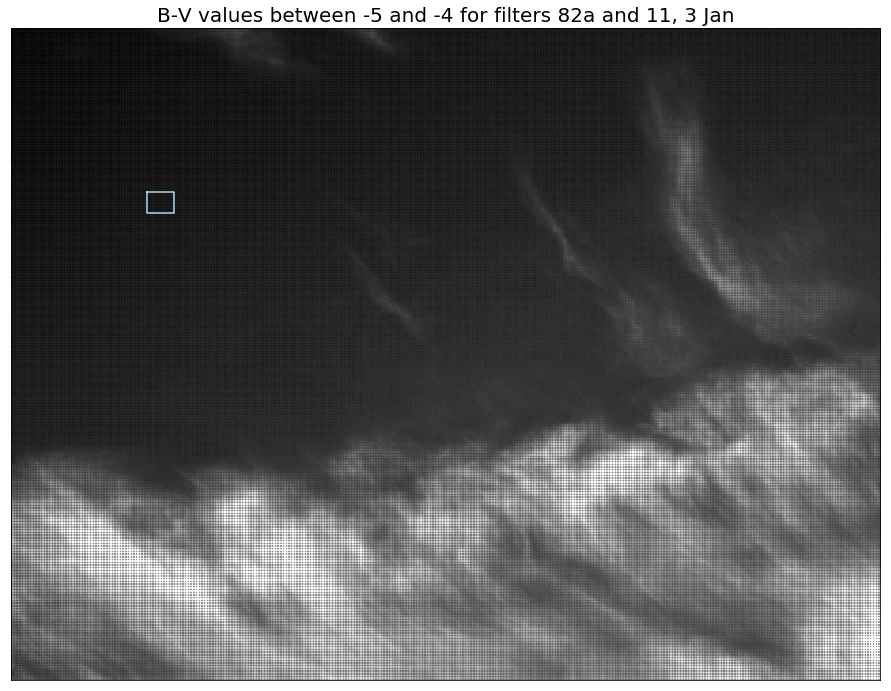

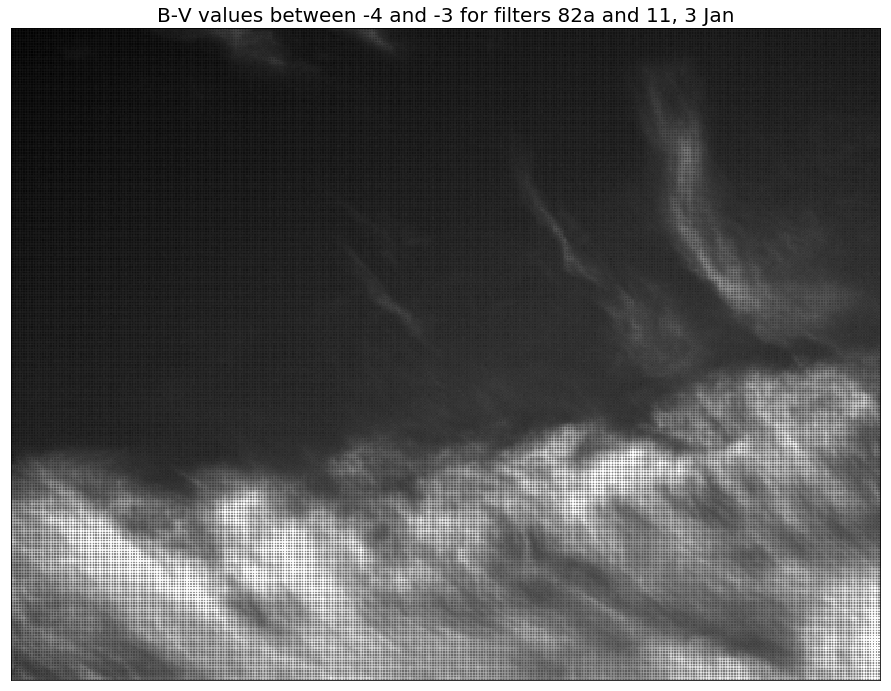

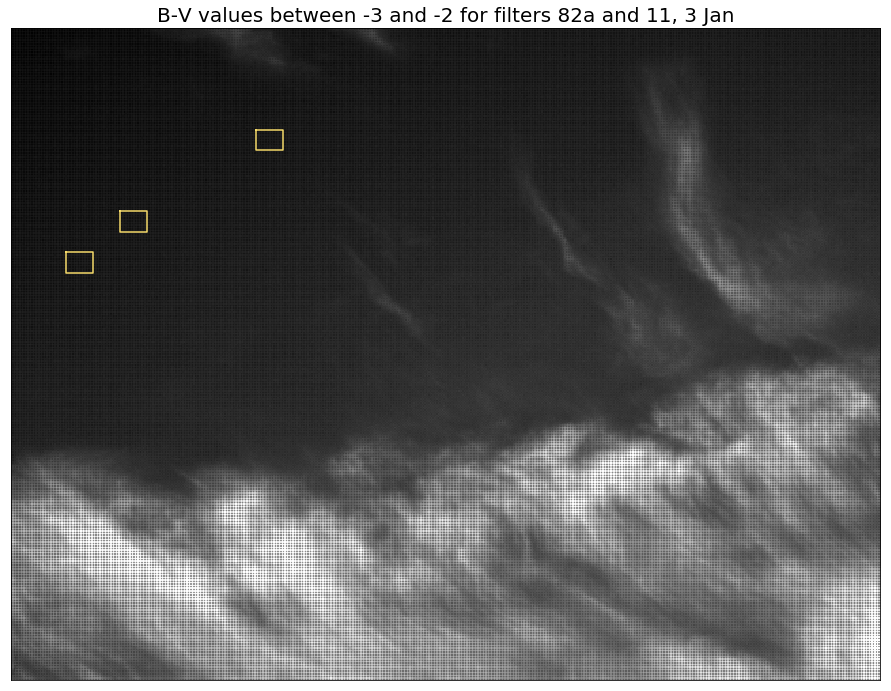

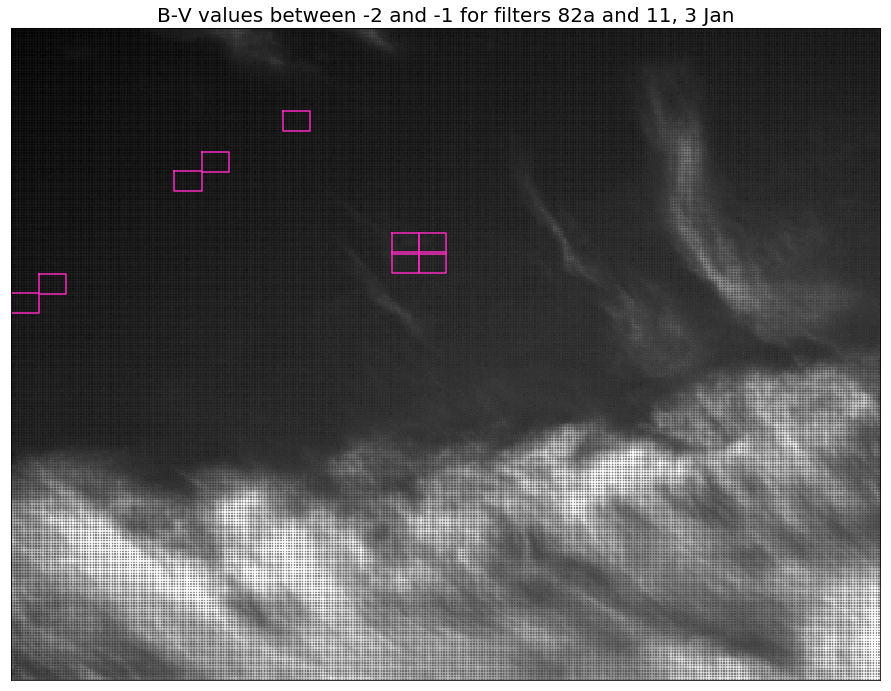

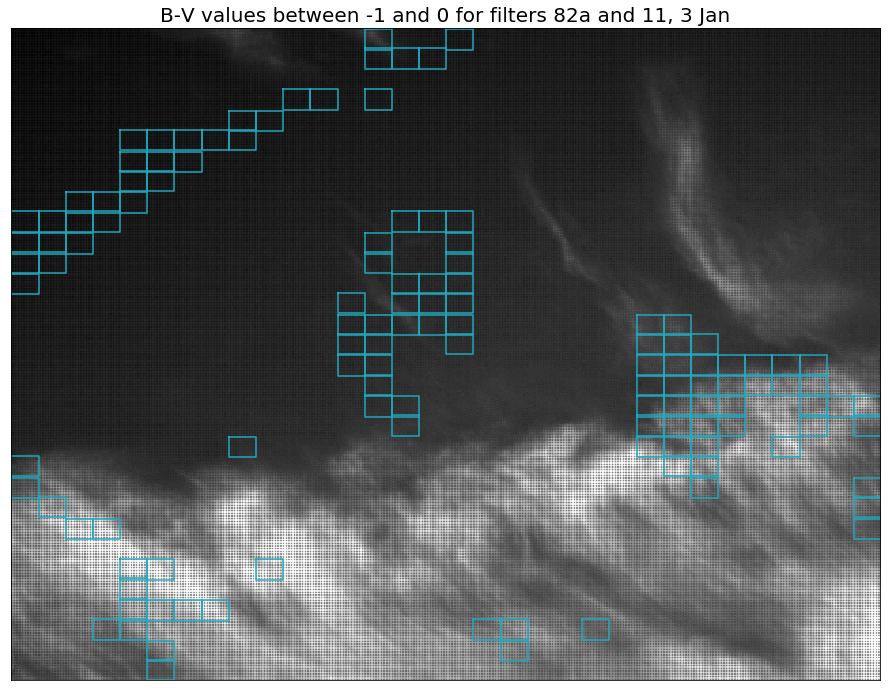

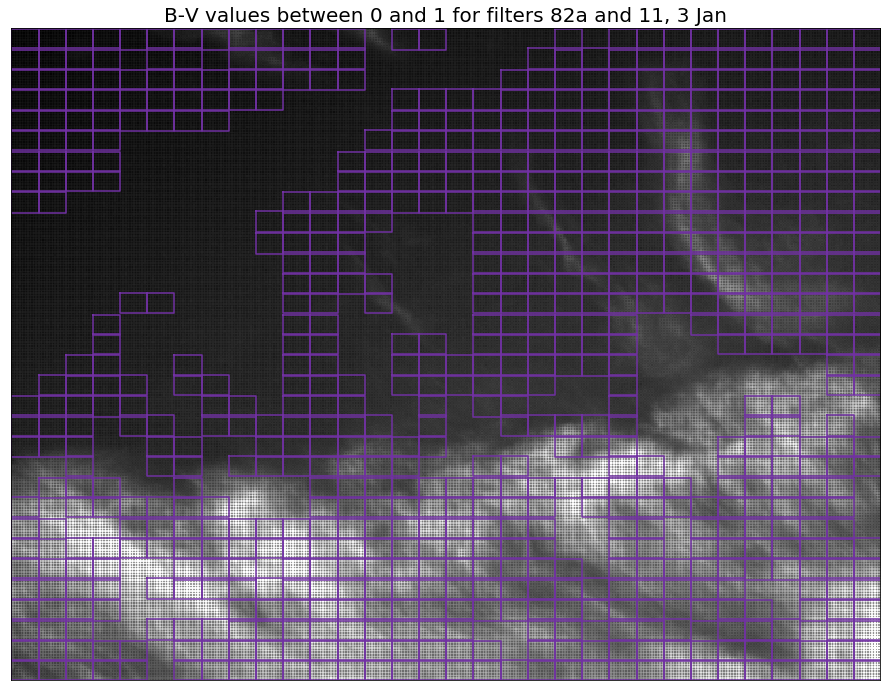

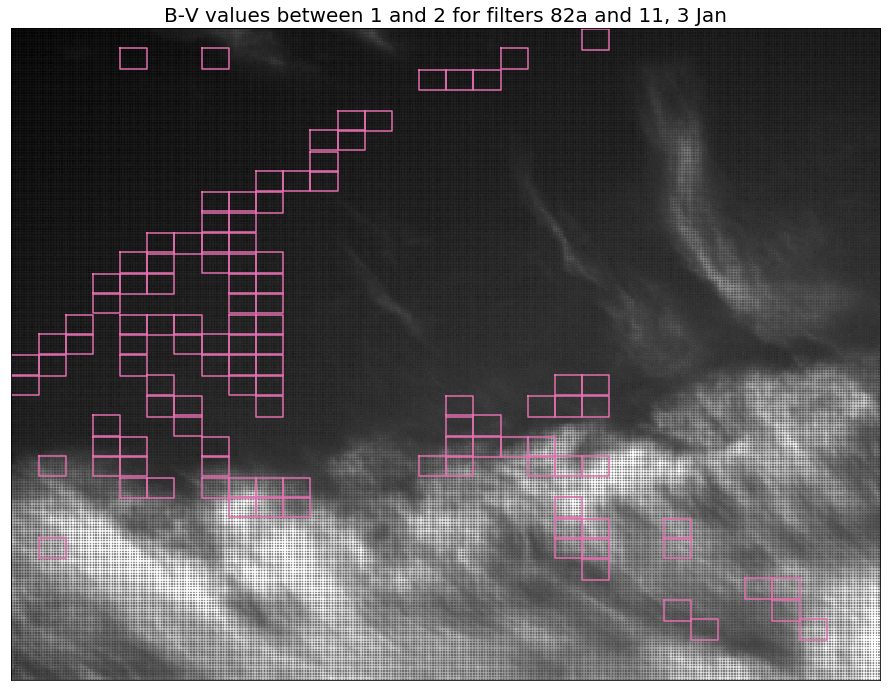

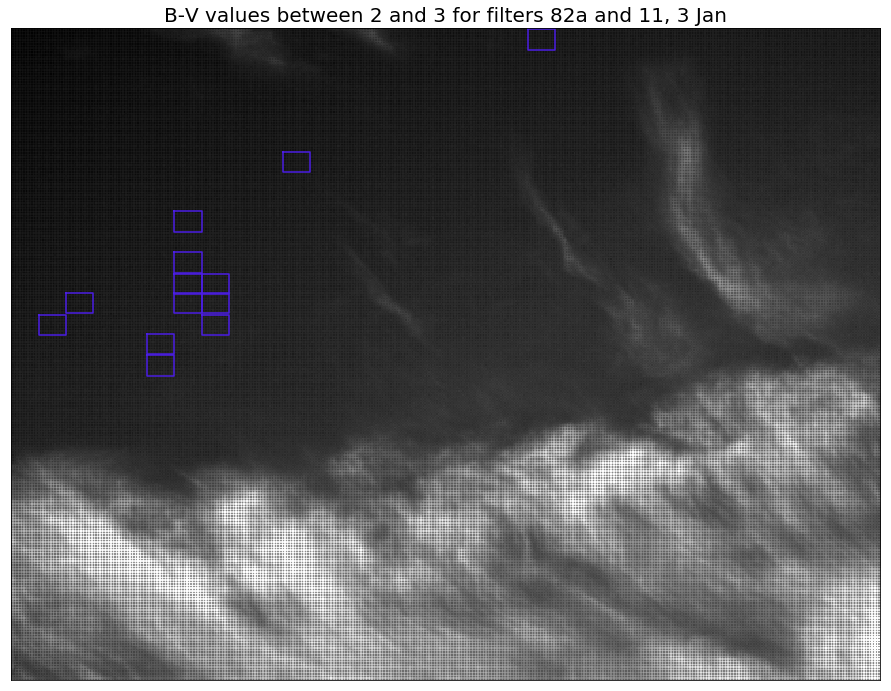

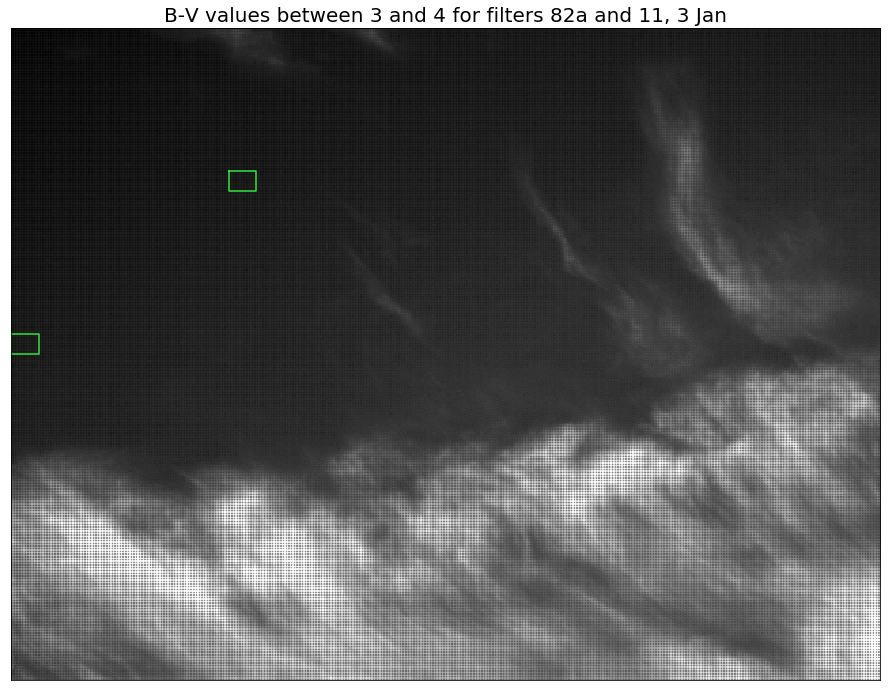

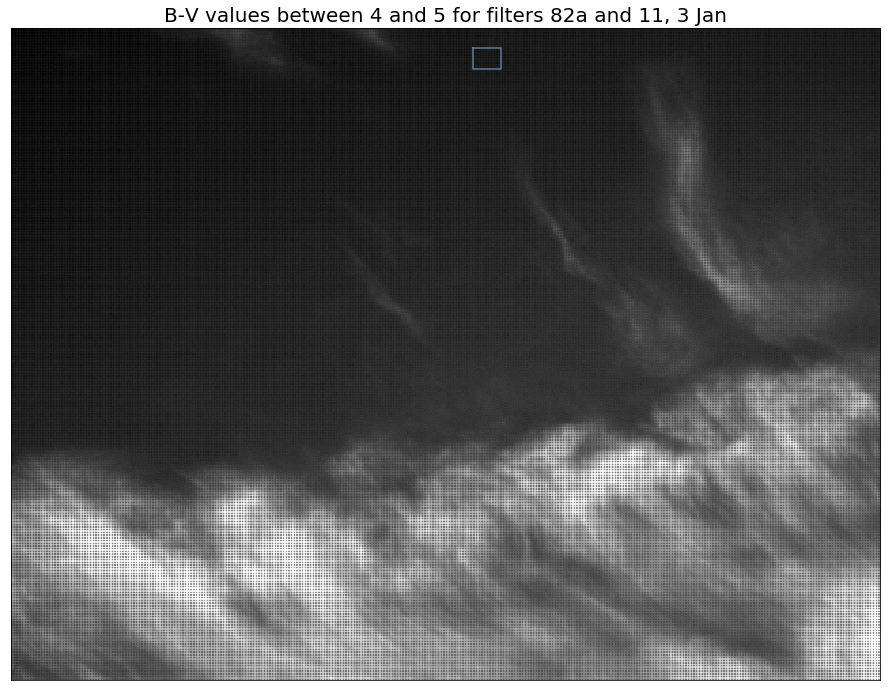

In [13]:
# Get FITS data and save for using in matplotlib ===========================
default = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera'
dir_extN = '3January2017/set1/none/200microsec'
imgN = '21-6-57-919.FIT'
pathN = '/'.join([default, dir_extN, imgN])
img_fileN = pathN if pathN[-4:] == '.FIT' else pathN + '.FIT'
hdu_list = fits.open(img_fileN)
hdu_list.info()
image_data = hdu_list[0].data
hdu_list.close()

cutoffs = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
filters = '82a and 11'

for i in range(len(cutoffs) -1):
    # create plot with image as background
    fig1 = plt.figure(figsize=(16, 12))
    ax1 = fig1.add_subplot(111)
    plt.imshow(image_data, cmap='gray')
    ax1.set_autoscale_on(False)

    # iterate over the rows
    p = 0
    pt = []
    color = np.random.rand(3,1)
    for index, row in good.iterrows():
        if cutoffs[i] < row['B-V'] < cutoffs[i+1]:
            # collect the vertices for the boxes
            r1 = literal_eval(row['v1'])
            r2 = literal_eval(row['v2'])
            r3 = literal_eval(row['v3'])
            r4 = literal_eval(row['v4'])

            # including the 1st point at the end again allows the boxes to be closed
            x = np.array([r1[0], r2[0], r3[0], r4[0], r1[0]])
            y = np.array([r1[1], r2[1], r3[1], r4[1], r1[1]])

             # ax.scatter(x, y, c='lime') # toggle to turn on plotting vertices
            ax1.plot(x, y, c=color, label=p)
            pt.append([p, row['B-V'], [r1, r2, r3, r4], color])
            p += 1

    ax1.set_title('B-V values between {} and {} for filters {}, 3 Jan'.format(cutoffs[i], cutoffs[i+1], filters), fontsize=20)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    #plt.legend()
    plt.show()

Interesting--there's a result where it's between 0 and 1 for the bulk of the cloud.

## B-V plots for 3 January, set 2, 82a to 11

In [14]:
# Open the dataframe for reading
dffile = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/3January2017/set2/FR_B-V_82a-11.csv'
B_V_df = pd.read_csv(dffile)

good = B_V_df.loc[B_V_df['B-V'] != -9999]
print(good['B-V'][:10])

print('MAXIMUM B-V VALUE')
print(good.max(numeric_only=True))
print('MINIMUM B-V VALUE')
print(good.min(numeric_only=True))

0     2.015248
1     0.644320
3    -1.046439
4    -1.496264
6     0.137604
7     0.570616
8    -0.120075
9    -1.737092
10   -1.191469
11   -0.639375
Name: B-V, dtype: float64
MAXIMUM B-V VALUE
Unnamed: 0    976.000000
B-V             5.473988
dtype: float64
MINIMUM B-V VALUE
Unnamed: 0    0.000000
B-V          -4.287858
dtype: float64


In [5]:
%%capture 
# Get FITS data and save for using in matplotlib ===========================
default = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera'
dir_extN = '3January2017/set2/none/250microsec'
imgN = '21-17-21-228.FIT'
pathN = '/'.join([default, dir_extN, imgN])
img_fileN = pathN if pathN[-4:] == '.FIT' else pathN + '.FIT'
hdu_list = fits.open(img_fileN)
hdu_list.info()
image_data = hdu_list[0].data
hdu_list.close()

cutoffs = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]
filters = '82a and 11'

for i in range(len(cutoffs) -1):
    # create plot with image as background
    fig1 = plt.figure(figsize=(16, 12))
    ax1 = fig1.add_subplot(111)
    plt.imshow(image_data, cmap='gray')
    ax1.set_autoscale_on(False)

    # iterate over the rows
    p = 0
    pt = []
    color = np.random.rand(3,1)
    for index, row in good.iterrows():
        if cutoffs[i] < row['B-V'] < cutoffs[i+1]:
            # collect the vertices for the boxes
            r1 = literal_eval(row['v1'])
            r2 = literal_eval(row['v2'])
            r3 = literal_eval(row['v3'])
            r4 = literal_eval(row['v4'])

            # including the 1st point at the end again allows the boxes to be closed
            x = np.array([r1[0], r2[0], r3[0], r4[0], r1[0]])
            y = np.array([r1[1], r2[1], r3[1], r4[1], r1[1]])

             # ax.scatter(x, y, c='lime') # toggle to turn on plotting vertices
            ax1.plot(x, y, c=color, label=p)
            pt.append([p, row['B-V'], [r1, r2, r3, r4], color])
            p += 1

    ax1.set_title('B-V values between {} and {} for filters {}, 3 Jan'.format(cutoffs[i], cutoffs[i+1], filters), fontsize=20)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    #plt.legend()
    plt.show()

The boxes are a little large compared to the resolution of the photo, but again, indicating a B-V between 0 and 1 for the cloud.

4:21 pm

Also emailed Bothun asking about level of precision for the B-V values.

In [5]:
# Open the dataframe for reading
dffile = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/3January2017/set3/FR_B-V_82a-11.csv'
B_V_df = pd.read_csv(dffile)

good = B_V_df.loc[B_V_df['B-V'] != -9999]
print(good['B-V'][:10])

print('MAXIMUM B-V VALUE')
print(good.max(numeric_only=True))
print('MINIMUM B-V VALUE')
print(good.min(numeric_only=True))

0    -0.221426
1    -0.216934
2    -0.389416
7    -0.623142
8    -0.482486
10    0.801444
11    0.774260
12    0.902241
13    1.183840
16    0.147357
Name: B-V, dtype: float64
MAXIMUM B-V VALUE
Unnamed: 0    2016.000000
B-V              5.215495
dtype: float64
MINIMUM B-V VALUE
Unnamed: 0    0.000000
B-V          -5.356439
dtype: float64


## B-V plots for January 3, set 3, 82a to 11

In [6]:
%%capture
# Get FITS data and save for using in matplotlib ===========================
default = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera'
dir_extN = '3January2017/set3/none/300microsec'
imgN = '21-24-10-189.FIT'
pathN = '/'.join([default, dir_extN, imgN])
img_fileN = pathN if pathN[-4:] == '.FIT' else pathN + '.FIT'
hdu_list = fits.open(img_fileN)
hdu_list.info()
image_data = hdu_list[0].data
hdu_list.close()

cutoffs = np.arange(-6,6,0.5)
filters = '82a and 11'

for i in range(len(cutoffs) -1):
    # create plot with image as background
    fig1 = plt.figure(figsize=(16, 12))
    ax1 = fig1.add_subplot(111)
    plt.imshow(image_data, cmap='gray')
    ax1.set_autoscale_on(False)

    # iterate over the rows
    p = 0
    pt = []
    color = np.random.rand(3,1)
    for index, row in good.iterrows():
        if cutoffs[i] < row['B-V'] < cutoffs[i+1]:
            # collect the vertices for the boxes
            r1 = literal_eval(row['v1'])
            r2 = literal_eval(row['v2'])
            r3 = literal_eval(row['v3'])
            r4 = literal_eval(row['v4'])

            # including the 1st point at the end again allows the boxes to be closed
            x = np.array([r1[0], r2[0], r3[0], r4[0], r1[0]])
            y = np.array([r1[1], r2[1], r3[1], r4[1], r1[1]])

             # ax.scatter(x, y, c='lime') # toggle to turn on plotting vertices
            ax1.plot(x, y, c=color, label=p)
            pt.append([p, row['B-V'], [r1, r2, r3, r4], color])
            p += 1

    ax1.set_title('B-V values between {} and {} for filters {}, 3 Jan'.format(cutoffs[i], cutoffs[i+1], filters), fontsize=20)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    plt.show()

5:00 pm

Tried to take some sun photos but it hit behind the clouds again. The fastest exposure the camera can do is 1 microsec.
    
## To Do

1. Think again about how to propagate error
2. Make a list of B-V combinations of filters to investigate
3. Investigate the above list in all sets
4. Take sun photos
5. Finally arrive at a flux ratio for moon/sun by examining both
6. Figure out a way to determine cloud detection--perhaps it hinges more precisely on whether a box has a B-V value equal to that of the values for sunlight? This accounts for invisible clouds too
7. Figure out a way to quantify how close the cloud B-V boxes have to be to the sunlight to count as valid

# 19 April 2017

8:52 am

## List of B-V filters to investigate

From (in order of visual to blue, roughly):

LRGBred, 15, 11, LRGBgreen, 82a, 47, LRGBblue

Broad spectrum: LRGBluminance

1. 82a-11
2. 82a-15
3. 82a-LRGBred
4. 82a-LRGBgreen
5. 47-11
6. 47-15
7. 47-LRGBred
8. 47-LRGBgreen
9. LRGBblue-LRGBred
10. LRGBblue-15
11. LRGBblue-11
12. LRGBblue-LRGBgreen

Here's what I found for the filter passbands

## Filter passbands

From an old paper ('Transmission of Wratten Filters', prepared for the Eastman Kodak Company)

    11: 420 to 700 nm; dominant wavelength 550.3 nm
    15: 510 to 700 nm; dominant wavelength 579.3
    47: 400 to 500 nm; dominant wavelength 463.7 nm
    82a: 400 to 700 nm; dominant wavelength 476.6


from http://micro.magnet.fsu.edu/primer/photomicrography/bwfilterchart.html 
(transmittance over 10%):

    47: 410-500 nm
    15: 520+ 

LRGB filters (from http://www.telescope.com/assets/product_files/instructions/29321_02-09.pdf):

    LRGBluminance: ~400-700 nm
    LRGBred: ~620-690 nm
    LRGBgreen: ~500-580 nm
    LRGBblue: ~380-525 nm


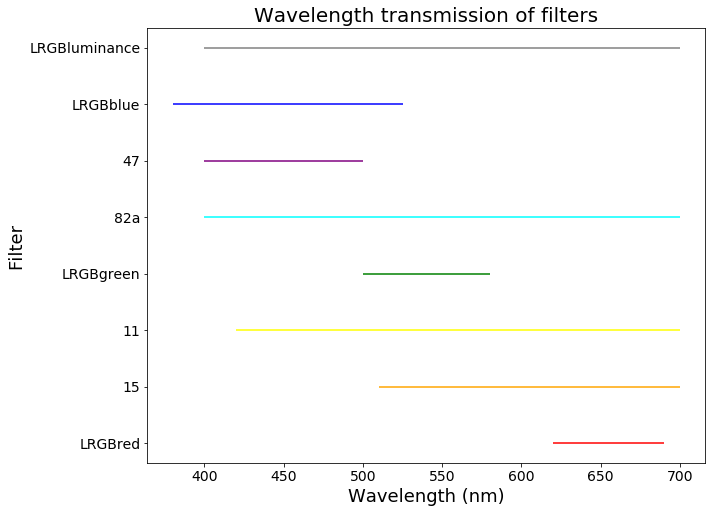

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,8))
y = np.arange(0,8)
order = ['LRGBred', '15', '11', 'LRGBgreen', '82a', '47', 'LRGBblue', 'LRGBluminance']
x1 = [620, 510, 420, 500, 400, 400, 380, 400]
x2 = [690, 700, 700, 580, 700, 500, 525, 700]

# Map value to color
color_mapper = np.vectorize(lambda x: {'LRGBred': 'red', '15': 'orange', '11': 'yellow', 
                                       'LRGBgreen': 'green', '82a': 'cyan', '47': 'purple',
                                       'LRGBblue': 'blue', 'LRGBluminance': 'gray'}.get(x))

# Plot a line for every line of data in your file
plt.hlines(y, x1, x2, colors=color_mapper(order), label='1')
plt.title('Wavelength transmission of filters', fontsize=20)
plt.ylabel('Filter', fontsize=18)
plt.xlabel('Wavelength (nm)', fontsize=18)
plt.yticks(y, order, fontsize=14)
plt.xticks(fontsize=14)
plt.show()

Looks like my estimation of which was redder and which was bluer was correct.

9:45 am

Okay, I think a good idea is to maybe build a file that lists the various things I need to generate plots of each B-V, so I can do it in batch.

In [75]:
test='FR_B-V_15-11.csv'
import re
test2 = re.sub('FR_B-V_', '', test)
test3 = re.sub('.csv', '', test2)
print(test3)
result = re.search(r'.+(?=-)', test3).group(0)
result2 = re.search(r'(?<=-).+', test3).group(0)
print(result)
print(result2)

15-11
15
11


In [79]:
path = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/10April2017_MOON/set1/FR_B-V_15-11.csv'

csvonly = re.search(r'FR.+.csv$', path).group(0)
print(csvonly)

FR_B-V_15-11.csv


In [81]:
setpath = re.search(r'.+(?=FR.+.csv$)', path).group(0)
print(setpath)

/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/10April2017_MOON/set1/


In [86]:
m1 = -5.3
m2 = 6.2
import math
print(math.floor(m1))
print(math.ceil(m2))

-6.0
7.0


10:50 am

Okay, I didn't make the file of images and paths and stuff to do this in batch, but I did fully update the plotting script which needed to be done first. It still requires 3 manual inputs at the beginning but it now properly creates plots and places them into a nice folder that it makes if it doesn't exist yet. The folder is under the given set and is under plots/filter1-filter2. 

# 22 April 2017

notes from meeting with BOthun 2:30 pm

Switched B-V in the flux ratio calculation

B-V for daytime sky: ~ -0.3 per The Observer's SKy Atlas, Erich Kark...

Clouds probably redder-- try some larger boxes.

Thick clouds can be blueish -- from the naval academy paper

To try: Open some images in DS9 and use the manual version of polyphot to draw polygons around the sky and around the cloud respectively and see what ballpark values we get.

Moon: ~0.94 (Photometry of the Lunar Surface, Link)

instrumental magnitude = -2.5 * log(cts) 

if know the real magnitude of the box, instrumental magnitude + zero point = real magnitude

Need to find the zero points to be added to B and V so that when I do B-V I get -0.3 for the sky (or appropriate values for moon, sun etc)

zero point should officially be independent of exposure time but for meit won't be because the instrumental magnitudes are different

need to incorporate the zero point so that we can deal with B-V values instead of flux ratios. zero point a function of exposure time.

Understanding zero point: http://www.stsci.edu/documents/dhb/web/c32_wfpc2dataanal.fm1.html

Mean wavelengths for U, B, V: 364 nm for U, 442 nm for B, 540 nm for V. Sun value of 0.63 is based on these values.

another link http://www.starlink.ac.uk/docs/sc17.htx/sc17se14.html

looks very useful: http://image-analysis.readthedocs.io/en/latest/index.html

3:30 pm

# 24 April 2017

8:50 am

To do:
- Study zero point; need to take the counts from the photometry and turn into a magnitude so we can get the actual B-V value
- For a variety of images, open them in DS9 and draw polygons over sky and cloud separately to get photometry. Then calculate flux ratios from there to get a better sense of B-V values in general.
- Do the same for the moon photos--draw over the moon.
- Take photos of sun





10:00 am

Finished doing MANUAL photometry around the moon in the 10 April data set. I did it this way:

## How to do photometry for a manually drawn circular region

1. Open image FIT file (manually using GUI because display command won't work for some reason) in DS9
2. Draw a circular region around the moon. To do so, make sure Region > Shape > Circle is selected, then under Edit, select "Region".
3. Run the polyphot commands, which are stored in the location: `/home/emc/GoogleDrive/Phys/Research/BothunLab/AnalysisFiles/10-April-2017_dataset`.
4. When cursor starts blinking, press `g` to define a polygon. Use the spacebar to trace the circle drawn in DS9 (the circle is just there to make your polygon fairly accurate).
5. When finished drawing polygon, press `q` to finish polygon. 
6. Press `j` to do the photometry of the polygon and send it to the log file.
7. Press `q` again when DS9 in focus and then a second time with terminal in focus.

Now I can just take the single report of counts and get the values for various combinations. Should also do this for the February moon data set to compare.

I need to quickly go down to the science library to reserve a room but then I'll work on zero point.

10:12 am

Now researching zeor point.

10:54 am
    
Quick calculation of B-V for some filters, using moon data.

In [6]:
from math import log10

def m(f):
    """
    calculate the apparent/instrumental magnitude
    """
    return round(-2.5*log10(f),2)

# fluxes for each filter. Taken from photometries
f11 = 40235.62
f15 = 27105.91
f47 = 1686.559
f82a = 59647.08
fred = 12812.36
fgreen = 22084.62
fblue = 13976.66
flum = 60027.88
fnone = 67539.54

m_moon = m(fnone)  # apparent magnitude of moon
print('apparent magnitude of moon (with no filter, 0.7 millisec): {}'.format(m_moon))
print('calibrated magnitude of moon, per Wikipedia, average value: -12.74')
zp = -12.74 - m_moon
print('zero point: {}'.format(zp))

def bv(f1, f2):
    """
    calculate and return a magnitude difference, i.e. the B-V index, for two images
    """
    m1 = -2.5 * log10(f1) + zp
    m2 = -2.5 * log10(f2) + zp
    return m1 - m2

print
print('Moon B-V values in various filters')
print('82a-11: {}'.format(round(bv(f82a, f11), 2)))
print('82a-15: {}'.format(round(bv(f82a, f15),2)))
print('LRGBblue-LRGB red: {}'.format(round(bv(fblue, fred),2)))
print('47-11: {}'.format(round(bv(f47, f11),2)))

apparent magnitude of moon (with no filter, 0.7 millisec): -12.07
calibrated magnitude of moon, per Wikipedia, average value: -12.74
zero point: -0.67

Moon B-V values in various filters
82a-11: -0.43
82a-15: -0.86
LRGBblue-LRGB red: -0.09
47-11: 3.44


# 25 April 2017

2:00 pm

Working on the code above from yesterday. Also: handy table of some apparent magnitudes; https://en.wikipedia.org/wiki/Apparent_magnitude

2:55 pm

Okay, it's looking fairly good. I have a zero point for 0.7 millisec. The problem is that Greg said zero point would be dependent on exposure and all the cloud pictures are at very different exposures, usually around 300 μs. But I think he also said not to worry about it...

3:30

BIG TABLE OF FILTER WAVELENGTHS https://en.wikipedia.org/wiki/Photometric_system

A comparison:

<table>
<tr>
<td colspan=4><b><center>UBV system</center></b></td>
</tr>
<tr>
<td>B filter</td>
<td>B filter FWHM</td>
<td>V filter</td>
<td>V filter FWHM</td>
</tr>
<tr>
<td>445 nm</td>
<td>94 nm</td>
<td>551 nm</td>
<td>88 nm</td>
</tr>
<tr>
<td colspan=4><b><center>My system</center></b></td>
</tr>
<tr>
<td>B filter (#47)</td>
<td>B filter (#47) FWHM</td>
<td>V filter (#11)</td>
<td>V filter (#11) FWHM</td>
</tr>
<tr>
<td>463 nm</td>
<td>~60 nm</td>
<td>550 nm</td>
<td>~110 nm</td>
</tr>
</table>

From http://www.telescope.com/assets/product_files/instructions/29538_02-15.pdf which are the stats for my filters FINALLY!!!!!

Aahh yeah okay the widths are very different for the visual filter. If the visual filter has a much wider passband, it will have a much higher flux, meaning the B-V value is much... lower? But my 47-11 index for the moon is about 3 times as large as it should be. Hmm...

4:00 pm

Asked Elsa for what's going on. She confirmed what Greg said but I failed to write down-- B-V should not be negative unless measuring a super hot star. So why are my values negative??

4:10 pm

Just realized I've been using the counts including the sky for the entire project and I should have been using the flux instead! Need to adjust code to use the right counts, and re-calculate all flux ratios (fine because I had to do that anyway and haven't yet).

4:23 pm

Elsa says I need to get the zero points in every filter, also. I think it would look like this

1. Find the apparent magnitude of moon through a single filter
2. Compare to published value of moon in B or V
3. Difference is zero point for that filter

So now the challenge is finding the published moon magnitudes in the B and V filters...

So far this paper looks the most promising:
- http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1980AJ.....85..314C&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf

It might also be in these:
- http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1962AJ.....67..147V&defaultprint=YES&page_ind=3&filetype=.pdf
- https://arxiv.org/pdf/1510.07574.pdf

but now I'm super hungry and want to go home!

5:00 pm

# 28 April 2017

3:30 pm

Found these values for moon color in this book https://books.google.com/books?hl=en&lr=&id=A883BQAAQBAJ&oi=fnd&pg=PA99&dq=moon+magnitude+in+visual+filter&ots=ckgWQGxmuw&sig=Qvnchx1iIfuEf0r6vappuwzMxc8#v=onepage&q=moon%20magnitude%20in%20visual%20filter&f=false

<img src="nondata images/mooncolors.png" />

Trouble is those aren't the wavelengths I need...

4:30 pm

I think I may have finally found one of the original papers on this matter. It's by Wildey, and specifically, he measured the photometry of 29 different sites on the moon:

http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?db_key=AST&bibcode=1964AJ.....69..619W&letter=0&classic=YES&defaultprint=YES&whole_paper=YES&page=619&epage=619&send=Send+PDF&filetype=.pdf

A nicer labeled image of the sites is from <a href="http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?db_key=AST&bibcode=1964AJ.....69..619W&letter=0&classic=YES&defaultprint=YES&whole_paper=YES&page=619&epage=619&send=Send+PDF&filetype=.pdf">this paper</a> by Winifred Cameron:

<img width=70% src="nondata images/moonsitelabels.png" />
    

The data:

5:00 pm

# 2 May 2017

3:00 pm

Okay, I got hung up last time trying to get the data from the paper. Going to keep trying. Other things to do:

1. Calculate zero points for all filters (divide them into groups, where one group is closer to 'B' and one to 'V')
2. Recalculate B-V values for moon, sun
3. Make sure am using correct counts (the Flux column)
4. Recalculate B-V dataframes for specific combinations of filters on all data sets
5. Plot cloud B-V values which match whatever the moon values are
6. Determine if it all worked or not
7. More pictures


3:43 pm

I FINALLY FOUND THE ORIGINAL ARTCILE. It's in French, the text does not have OCR, and it took half hour of sifting through mysterious French websites but I have it. Now to translate it to make sure I don't misunderstand.

I found it by checking the article Greg found by Link, "photometry of the lunar surface." Link gives the value 0.94 for the moon and cites Gallouet 1963, which is NOT discoverable via Google, Google Scholar or the library, even. It was a long process but at least the citation included the short name of the journal, Compt Rend Acad Sci Paris. Turns out this journal changed names and organization like 5 times in 100 years. Here's the site I found that explains and links to the organization for each time period:

http://www.academie-sciences.fr/en/Transmettre-les-connaissances/comptes-rendus-de-l-academie-des-sciences-numerisees-sur-le-site-de-la-bibliotheque-nationale-de-france.html

Anyway, the result is -12.75 ± 0.01 for the moon in the visual band. The B-V ratio is 0.94 so we just have to do a simple calculatino to get the B out.

In [3]:
from math import log10
v = -12.75
b_v = 0.94
# solve b_v = -2.5 * log10(b/v) for b:
b = (10**(b_v/(-2.5)))*v
print(b)

-5.364264511901662

In [8]:
b_v_calc = -2.5*log10(-5.364/-12.75)
b_v_calc

0.9400535389760317

## Published magnitudes of moon in B, V bands
At long last the published values of the moon in the UBV system are 

B = -5.36<br />
V = -12.75

In [32]:
from math import log10

def m(f):
    """
    calculate the apparent/instrumental magnitude
    """
    return round(-2.5*log10(f),2)

def bv(flux_b, flux_v):
    """
    calculate and return a magnitude difference, i.e. the B-V index, for two images
    flux_b: flux through the bluer filter
    flux_v: flux through the visual filter
    """
    m_blue = -2.5 * log10(flux_b) + zp_blue
    m_visual = -2.5 * log10(flux_v) + zp_visual
    return m_blue - m_visual

from math import log10
v = -12.75
b_v = 0.94
# solve b_v = -2.5 * log10(b/v) for b:
b = (10**(b_v/(-2.5)))*v
print('Magnitude in visual filter: {} (Gallouet 1963)'.format(v))
print('B-V of moon: {} (Gallouet 1963)'.format(b_v))
print('Magnitude in blue filter: {} (calculated by solving the b-v equation for b)'.format(b))
print

# fluxes for each filter. Taken from photometries
f11 = 40235.62
f15 = 27105.91
f47 = 1686.559
f82a = 59647.08
fred = 12812.36
fgreen = 22084.62
fblue = 13976.66
flum = 60027.88
fnone = 67539.54

m_moon = m(fnone)  # apparent magnitude of moon with no filter using our camera
print('apparent magnitude of moon (our camera, with no filter, 0.7 millisec): {}'.format(m_moon))
print
# zero points
zp_blue = b - m_moon
zp_visual = v - m_moon
print('Calculated zero point using published values and our measured moon magnitude')
print('blue: {}, visual: {}'.format(zp_blue, zp_visual))

print
print('Moon B-V values in various filters')
print('82a-11: {}'.format(round(bv(f82a, f11), 2)))
print('82a-15: {}'.format(round(bv(f82a, f15),2)))
print('LRGBblue-LRGB red: {}'.format(round(bv(fblue, fred),2)))
print('47-11: {}'.format(round(bv(f47, f11),2)))
print('LRGBblue-LRGBgreen: {}'.format(round(bv(fblue, fgreen), 2))

Magnitude in visual filter: -12.75 (Gallouet 1963)
B-V of moon: 0.94 (Gallouet 1963)
Magnitude in blue filter: -5.3642645119 (calculated by solving the b-v equation for b)

apparent magnitude of moon (our camera, with no filter, 0.7 millisec): -12.07

Calculated zero point using published values and our measured moon magnitude
blue: 6.7057354881, visual: -0.68

Moon B-V values in various filters
82a-11: 6.96
82a-15: 6.53
LRGBblue-LRGB red: 7.29
47-11: 10.83
LRGBblue-LRGBgreen: 7.88


Well these values are definitely posiive but they should be smaller... we would think. Especially the value for 47-11 which is the closest thing I have to real B-V.

Ranges are for width at full width half max


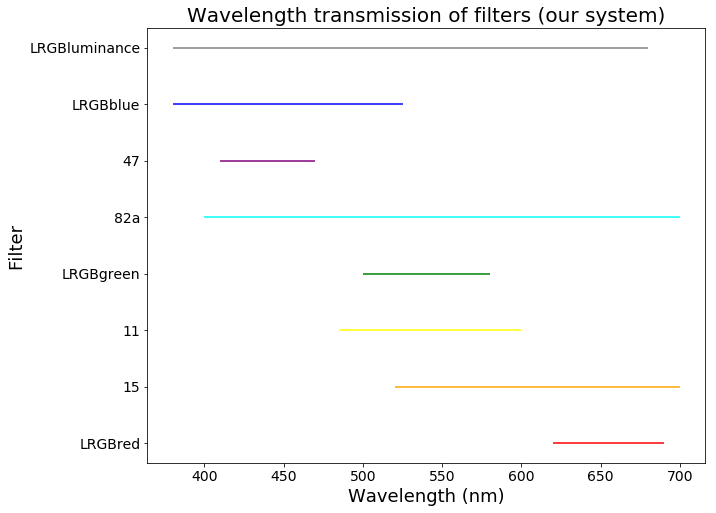

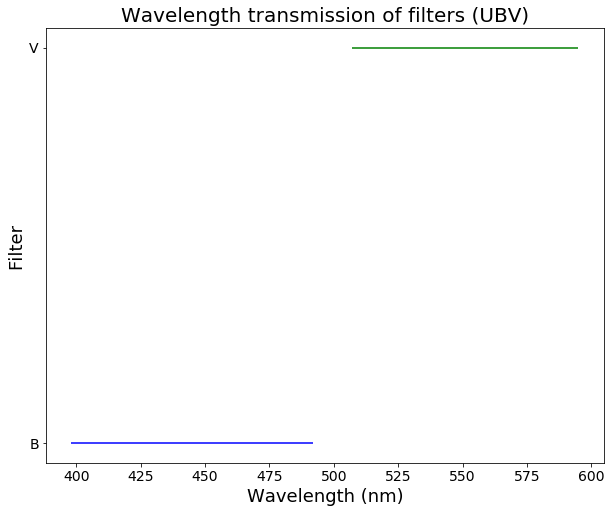

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,8))
y = np.arange(0,8)
order = ['LRGBred', '15', '11', 'LRGBgreen', '82a', '47', 'LRGBblue', 'LRGBluminance']
x1 = [620, 520, 485, 500, 400, 410, 380, 380]
x2 = [690, 700, 600, 580, 700, 470, 525, 680]

# Map value to color
color_mapper = np.vectorize(lambda x: {'LRGBred': 'red', '15': 'orange', '11': 'yellow', 
                                       'LRGBgreen': 'green', '82a': 'cyan', '47': 'purple',
                                       'LRGBblue': 'blue', 'LRGBluminance': 'gray'}.get(x))

print('Ranges are for width at full width half max')
# Plot a line for every line of data in your file
plt.hlines(y, x1, x2, colors=color_mapper(order), label='1')
plt.title('Wavelength transmission of filters (our system)', fontsize=20)
plt.ylabel('Filter', fontsize=18)
plt.xlabel('Wavelength (nm)', fontsize=18)
plt.yticks(y, order, fontsize=14)
plt.xticks(fontsize=14)
plt.show()

fig2 = plt.figure(figsize=(10,8))
y2 = np.arange(0,2)
order_2 = ['B', 'V']
x1_2 = [398, 507]
x2_2 = [492, 595]

# Map value to color
color_mapper = np.vectorize(lambda x: {'B': 'blue', 'V': 'green'}.get(x))

# Plot a line for every line of data in your file
plt.hlines(y2, x1_2, x2_2, colors=color_mapper(order_2))
plt.title('Wavelength transmission of filters (UBV)', fontsize=20)
plt.ylabel('Filter', fontsize=18)
plt.xlabel('Wavelength (nm)', fontsize=18)
plt.yticks(y2, order_2, fontsize=14)
plt.xticks(fontsize=14)
plt.show()



Looks like the LRGB blue and LRGB green filters are actually more similar to actual B and V filters. I've gone back and calculated their B-V value in my system above, which turns out to be: 

LRGBblue-LRGBgreen: 7.88

This still seems high. I emailed Elsa for help.

4:33 pm

Nope, wait, I figured it out. I used the magnitude through the 'none' filter still instead of the correct filters. Need to do what I originally put in my todo list and calculate the zero point for EACH FREAKING FILTER. 

5:03 pm
    
Made some nicer versions of the plots above using HighCharts!

<img src="nondata images/wavelengthrange_ours.png" /> located at http://jsfiddle.net/etacarinae/eh9rj0rj/3/

<img src="nondata images/wavelengthrange_ubv.png" /> located at https://jsfiddle.net/etacarinae/spd7z2cn/



5:15 pm

Okay back to the work of calculating the real-ass zero points.

In [66]:
from math import log10

def m(f):
    """
    calculate the apparent/instrumental magnitude through a given filter.
    
    :param f: the flux through that particular filter.
    """
    return round(-2.5*log10(f),2)

def bv(flux_b, flux_v, zp_blue, zp_visual):
    """
    calculate and return a magnitude difference, i.e. the B-V index, for two images
    
    :param flux_b: flux through the bluer filter
    :param flux_v: flux through the visual filter
    """

    m_blue = -2.5 * log10(flux_b) + zp_blue
    m_visual = -2.5 * log10(flux_v) + zp_visual
    return round(m_blue - m_visual, 2)

# Published values of v and b-v for the moon, and the b value derived from which.
v = -12.75
b_v = 0.94
# solve b_v = -2.5 * log10(b/v) for b:
b = (10**(b_v/(-2.5)))*v
print('Magnitude in visual filter: {}'.format(v))
print('B-V of moon: {}'.format(b_v))
print('Magnitude in blue filter: {} (calculated)'.format(b))
print('(Gallouet 1963)')

# fluxes for each filter. Taken from photometries =============================================
fnone = 67539.54

# visual-er filters: filters with their dominant/central wavelength > 550 nm
f11 = 40235.62
f15 = 27105.91
fred = 12812.36
fgreen = 22084.62

# bluer filters: filters with their dominant/central wavelength < 550 nm
f47 = 1686.559
f82a = 59647.08
fblue = 13976.66
flum = 60027.88

Magnitude in visual filter: -12.75
B-V of moon: 0.94
Magnitude in blue filter: -5.3642645119 (calculated by solving the b-v equation for b)
(Gallouet 1963)


## Visual-er filters, zero points

In [57]:
# filter #11
m_moon_11 = m(f11)
zp_b_11 = b - m_moon_11
zp_v_11 = v - m_moon_11

print('Apparent magnitude of moon (our camera, filter #11, 0.7 millisec): {}'.format(m_moon_11))
print

print('Calculated zero point using published values and measured moon magnitude in filter #11')
print('blue: {}, visual: {}'.format(zp_b_11, zp_v_11))

Apparent magnitude of moon (our camera, filter #11, 0.7 millisec): -11.51

Calculated zero point using published values and measured moon magnitude in filter #11
blue: 6.1457354881, visual: -1.24


In [38]:
# filter #15
m_moon_15 = m(f15)
zp_b_15 = b - m_moon_15
zp_v_15 = v - m_moon_15

print('Apparent magnitude of moon (our camera, filter #15, 0.7 millisec): {}'.format(m_moon_15))
print

print('Calculated zero point using published values and measured moon magnitude in filter #15')
print('blue: {}, visual: {}'.format(zp_b_15, zp_v_15))

Apparent magnitude of moon (our camera, filter #15, 0.7 millisec): -11.08

Calculated zero point using published values and measured moon magnitude in filter #15
blue: 5.7157354881, visual: -1.67


In [40]:
# filter LRGB red
m_moon_red = m(fred)
zp_b_red = b - m_moon_red
zp_v_red = v - m_moon_red

print('Apparent magnitude of moon (our camera, filter LRGB red, 0.7 millisec): {}'.format(m_moon_red))
print

print('Calculated zero point using published values and measured moon magnitude in filter LRGB red')
print('blue: {}, visual: {}'.format(zp_b_red, zp_v_red))

Apparent magnitude of moon (our camera, filter LRGB red, 0.7 millisec): -10.27

Calculated zero point using published values and measured moon magnitude in filter LRGB red
blue: 4.9057354881, visual: -2.48


In [70]:
# filter LRGB green
m_moon_green = m(fgreen)
zp_b_green = b - m_moon_green
zp_v_green = v - m_moon_green

print('Apparent magnitude of moon (our camera, filter LRGB green, 0.7 millisec): {}'.format(m_moon_green))
print

print('Calculated zero point using published values and measured moon magnitude in filter LRGB green')
print('blue: {}, visual: {}'.format(zp_b_green, zp_v_green))

Apparent magnitude of moon (our camera, filter LRGB green, 0.7 millisec): -10.86

Calculated zero point using published values and measured moon magnitude in filter LRGB green
blue: 5.4957354881, visual: -1.89


## Bluer filters, zero points

In [42]:
# filter #47
m_moon_47 = m(f47)
zp_b_47 = b - m_moon_47
zp_v_47 = v - m_moon_47

print('Apparent magnitude of moon (our camera, filter #47, 0.7 millisec): {}'.format(m_moon_47))
print

print('Calculated zero point using published values and measured moon magnitude in filter #47')
print('blue: {}, visual: {}'.format(zp_b_47, zp_v_47))

Apparent magnitude of moon (our camera, filter #47, 0.7 millisec): -8.07

Calculated zero point using published values and measured moon magnitude in filter #47
blue: 2.7057354881, visual: -4.68


In [43]:
# filter #82a
m_moon_82a = m(f82a)
zp_b_82a = b - m_moon_82a
zp_v_82a = v - m_moon_82a

print('Apparent magnitude of moon (our camera, filter #82a, 0.7 millisec): {}'.format(m_moon_82a))
print

print('Calculated zero point using published values and measured moon magnitude in filter #82a')
print('blue: {}, visual: {}'.format(zp_b_82a, zp_v_82a))

Apparent magnitude of moon (our camera, filter #82a, 0.7 millisec): -11.94

Calculated zero point using published values and measured moon magnitude in filter #82a
blue: 6.5757354881, visual: -0.81


In [44]:
# filter LRGB luminance
m_moon_lum = m(flum)
zp_b_lum = b - m_moon_lum
zp_v_lum = v - m_moon_lum

print('Apparent magnitude of moon (our camera, filter LRGB luminance, 0.7 millisec): {}'.format(m_moon_lum))
print

print('Calculated zero point using published values and measured moon magnitude in filter #lum')
print('blue: {}, visual: {}'.format(zp_b_lum, zp_v_lum))

Apparent magnitude of moon (our camera, filter LRGB luminance, 0.7 millisec): -11.95

Calculated zero point using published values and measured moon magnitude in filter #lum
blue: 6.5857354881, visual: -0.8


In [46]:
# filter LRGB blue
m_moon_blue = m(fblue)
zp_b_blue = b - m_moon_blue
zp_v_blue = v - m_moon_blue

print('Apparent magnitude of moon (our camera, filter LRGB blue, 0.7 millisec): {}'.format(m_moon_blue))
print

print('Calculated zero point using published values and measured moon magnitude in filter #blue')
print('blue: {}, visual: {}'.format(zp_b_blue, zp_v_blue))

Apparent magnitude of moon (our camera, filter LRGB blue, 0.7 millisec): -10.36

Calculated zero point using published values and measured moon magnitude in filter #blue
blue: 4.9957354881, visual: -2.39


## Calculating

In [69]:
print('Moon B-V values in various filters')
print('==================================')
print('LRGBblue-11: {}'.format(bv(fblue, f11, zp_b_blue, zp_v_11)))
print('LRGBblue-15: {}'.format(bv(fblue, f15, zp_b_blue, zp_v_15)))
print('LRGBblue-LRGB red: {}'.format(bv(fblue, fred, zp_b_blue, zp_v_red)))
print('LRGB blue-LRGB green: {}'.format(bv(fblue, fgreen, zp_b_blue, zp_v_green)))
print
print('82a-11: {}'.format(bv(f82a, f11, zp_b_82a, zp_v_11)))
print('82a-15: {}'.format(bv(f82a, f15, zp_b_82a, zp_v_15)))
print('82a-LRGB red: {}'.format(bv(f82a, fred, zp_b_82a, zp_v_red)))
print('82a-LRGB green: {}'.format(bv(f82a, fgreen, zp_b_82a, zp_v_green)))
print
print('47-11: {}'.format(bv(f47, f11, zp_b_47, zp_v_11)))
print('47-15: {}'.format(bv(f47, f15, zp_b_47, zp_v_15)))
print('47-LRGB red: {}'.format(bv(f47, fred, zp_b_47, zp_v_red)))
print('47-LRGB green: {}'.format(bv(f47, fgreen, zp_b_47, zp_v_green)))
print
print('LRGB lum-11: {}'.format(bv(flum, f11, zp_b_lum, zp_v_11)))
print('LRGB lum-15: {}'.format(bv(flum, f15, zp_b_lum, zp_v_15)))
print('LRGB lum-LRGB red: {}'.format(bv(flum, fred, zp_b_lum, zp_v_red)))
print('LRGB lum-LRGB green: {}'.format(bv(flum, fgreen, zp_b_lum, zp_v_green)))


Moon B-V values in various filters
LRGBblue-11: 7.38
LRGBblue-15: 7.38
LRGBblue-LRGB red: 7.38
LRGB blue-LRGB green: 7.38

82a-11: 7.39
82a-15: 7.39
82a-LRGB red: 7.39
82a-LRGB green: 7.39

47-11: 7.39
47-15: 7.39
47-LRGB red: 7.39
47-LRGB green: 7.39

LRGB lum-11: 7.39
LRGB lum-15: 7.39
LRGB lum-LRGB red: 7.39
LRGB lum-LRGB green: 7.39


5:45 pm

A quick summary of the values found...

<table> 
<tr>
<td>Filter</td> <td>Magnitude</td>
</tr>
<tr> 
<td><b>B (UBV)</b></td> <td><b>-5.36</b></td>
</tr>
<tr>
<td>47</td> <td>-8.07</td> 
</tr>
<tr>
<td>LRGB blue</td> <td>-10.36</td> 
</tr>
<tr>
<td>82a</td> <td>-11.94</td> 
</tr>
<tr>
<td>LRGB luminance</td> <td>-11.95</td> 
</tr>
<tr><td><b>V (UBV)</b></td> <td><b>-12.75</b></td>
</tr>
<tr>
<td>11</td> <td>-11.51</td> 
</tr>
<tr>
<td>15</td> <td>-11.08</td>
</tr>
<tr>
<td>LRGB green</td> <td>-10.86</td>  
</tr>
<tr>
<td>LRGB red</td> <td>-10.27</td> 
</tr>


</table>

It seems surprising that the filters I designated as "blueish filters" have magnitudes much closer to that of the real moon through the visual filter. But I don't necessarily think it means I've classified incorrectly--more likely, those particular filters just let in more light than the visual filter. After all, the magnitude is just a straight calculation relating to the logarithm of the flux.

HOWEVER, since the values are still indeed very different from the UBV system, that could possibly explain the unusual B-V values I'm getting.

But they still shouldn't be that high, as I discussed with Elsa. Must be some other problem.... 

Still to do: 

1. Figure out if my zero points are correct, why the B-V values for moon are so high
2. Arrive at final B-V values for moon; calculate them for Sun also 
3. Make sure am using correct counts (the Flux column)
4. Recalculate B-V dataframes for specific combinations of filters on all data sets
5. Plot cloud B-V values which match whatever the moon values are
6. Determine if it all worked or not
7. More pictures

Also I could maybe take some time now to generate photometries for any data sets that I haven't done yet.

6:20 pm

Collected pixel statistics for 21 April and 28 April (Sun). still need to run photometry. Another good idea would be to go through the junkier folders and see what images are salvageable.

7:00 pm